# EDA — 2025 KOPIS Performance Dataset

## 1/ Area Distribution
- Highly unbalanced data by area
- Seoul & Gyeonggi: 13,000 / 18,000 performances (~72%)
- Other regions: very few performances

**Implication for recommendation system:**
- Users outside Seoul may get fewer or less relevant recommendations
- Model could be biased toward Seoul performances

---

## 2/ Genre Distribution
- Music (Classical, Pop): > 50% of performances
- Theatre & Comedy Musical: 8,000 / 18,000 (~44%)
- Dance genres: very rare

**Implication:**
- Popular genres dominate recommendations
- Less popular genres may be under-represented

---

## 3/ Temporal Patterns
- Peak months: **May – September**
- Interesting contrast: Europe (e.g., France) has fewer performances in July–August

**Implication:**
- Consider **temporal weighting** in recommendation system
- Cold months may require additional strategies

---

## 4/ Recommendations & Questions
- Data imbalance by area/genre → need re-weighting or stratified sampling
- Seasonality → model should handle uneven monthly distribution
- Questions:
  - How to ensure fair recommendations for users outside Seoul?
  - Should rare genres get boosted?
  - How to account for seasonal effects in recommendations?

---

> Dataset is heavily skewed toward Seoul and music performances, and most events occur May–September. Recommendation system design must address **geographic, genre, and temporal imbalances** to provide fair and useful suggestions.


> Can possibly add more information from details dataset (venue, director, ...etc)



In [3]:
import pandas as pd
from conf.config import settings
import os
from pathlib import Path

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
font_prop = fm.FontProperties(fname=settings.KOREAN_FONT_PATH)

# Import data

In [7]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
path = os.path.join(BASE_DIR, Path(settings.RAW_DATA_FOLDER), Path(settings.PERFORMANCE_DATA_FILE))

In [11]:
df = pd.read_csv(path, encoding="utf-8-sig")

In [12]:
df.head()

,mt20id,prfnm,prfpdfrom,prfpdto,fcltynm,poster,area,genrenm,openrun,prfstate
0,PF270446,헨젤과 그레텔의 과자 콘서트 [청주],2025.01.17,2025.08.31,오즈아트홀,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,충청북도,뮤지컬,N,공연완료
1,PF258371,오징어키즈게임 [인천 남동],2025.01.13,2025.02.16,루시드아트홀,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,인천광역시,서커스/마술,N,공연완료
2,PF258045,정열의 라틴 그루브! 이규재 라틴재즈올스타 [대전],2025.01.25,2025.01.25,옐로우택시,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,대전광역시,대중음악,N,공연완료
3,PF257952,동춘서커스 [안산],2025.01.01,2025.06.30,동춘서커스 빅탑극장,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,경기도,서커스/마술,N,공연완료
4,PF257891,경기북부민중행동 신년음악회 우위영 콘서트,2025.01.23,2025.01.23,고양어울림누리,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,경기도,대중음악,N,공연완료


# Transform data

In [ ]:
def get_months(row):
    all_days = pd.date_range(row['start_date'], row['end_date'], freq='D')
    return all_days.month.unique().tolist()

In [57]:
df['start_date'] = pd.to_datetime(df['prfpdfrom'], format='%Y.%m.%d')
df['end_date'] = pd.to_datetime(df['prfpdto'], format='%Y.%m.%d')

In [61]:
df['months'] = df.apply(get_months, axis=1)

df_exploded = df.explode('months')
df_exploded.head()

,mt20id,prfnm,prfpdfrom,prfpdto,fcltynm,poster,area,genrenm,openrun,prfstate,start_date,end_date,months
0,PF270446,헨젤과 그레텔의 과자 콘서트 [청주],2025.01.17,2025.08.31,오즈아트홀,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,충청북도,뮤지컬,N,공연완료,2025-01-17,2025-08-31,1
0,PF270446,헨젤과 그레텔의 과자 콘서트 [청주],2025.01.17,2025.08.31,오즈아트홀,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,충청북도,뮤지컬,N,공연완료,2025-01-17,2025-08-31,2
0,PF270446,헨젤과 그레텔의 과자 콘서트 [청주],2025.01.17,2025.08.31,오즈아트홀,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,충청북도,뮤지컬,N,공연완료,2025-01-17,2025-08-31,3
0,PF270446,헨젤과 그레텔의 과자 콘서트 [청주],2025.01.17,2025.08.31,오즈아트홀,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,충청북도,뮤지컬,N,공연완료,2025-01-17,2025-08-31,4
0,PF270446,헨젤과 그레텔의 과자 콘서트 [청주],2025.01.17,2025.08.31,오즈아트홀,http://www.kopis.or.kr/upload/pfmPoster/PF_PF2...,충청북도,뮤지컬,N,공연완료,2025-01-17,2025-08-31,5


# Nb of performances by month

In [71]:
monthly_counts = df_exploded.groupby('months').size().reset_index(name='count').sort_values('months')
monthly_counts

,months,count
0,1,2725
1,2,3153
2,3,3963
3,4,3995
4,5,4390
5,6,4553
6,7,4354
7,8,4697
8,9,4770
9,10,3904


# Nb of performances by month and genre

/Users/seohyun/Project/performance-recommander/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seohyun/Project/performance-recommander/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


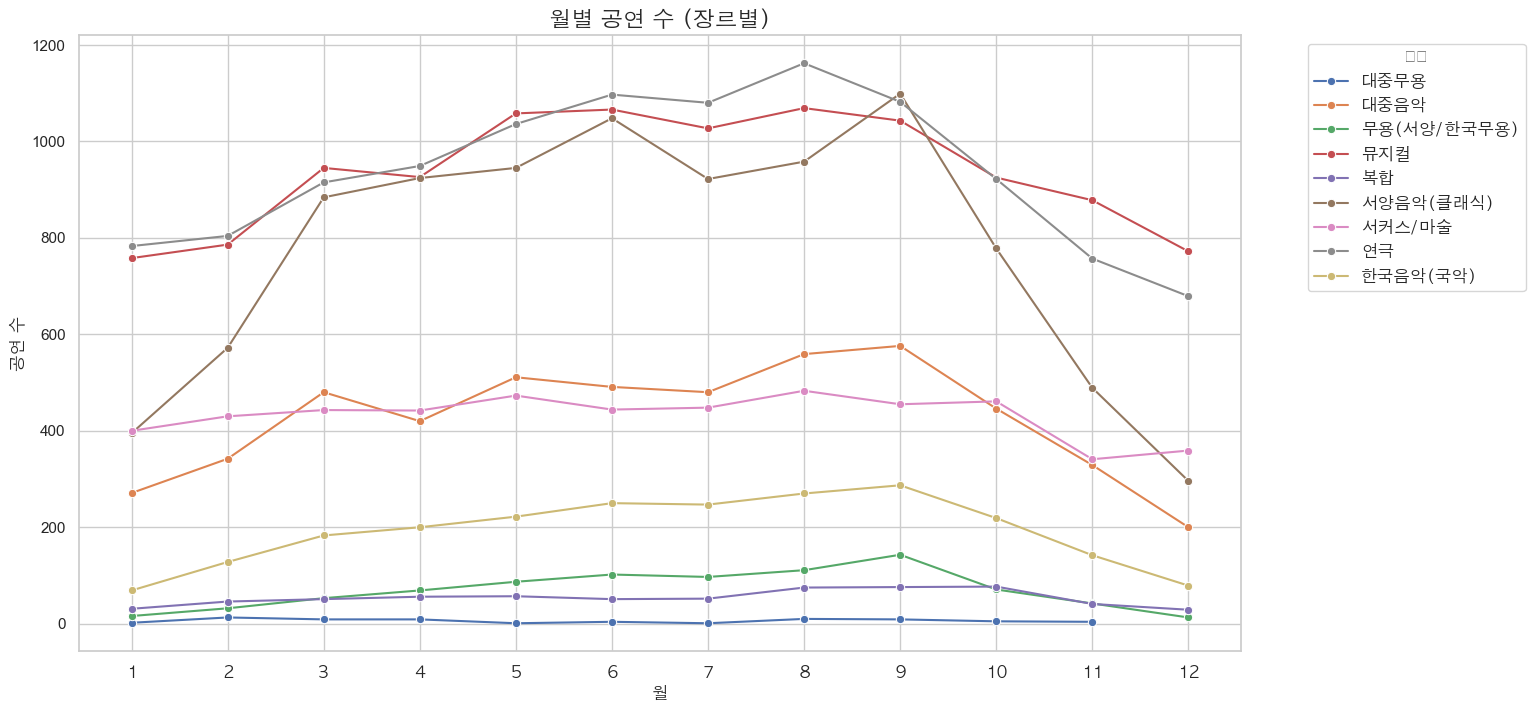

In [69]:
monthly_genre_counts = df_exploded.groupby(['months', 'genrenm']).size().reset_index(name='count').sort_values('months')

plt.figure(figsize=(15,8))
sns.lineplot(
    data=monthly_genre_counts,
    x='months',
    y='count',
    hue='genrenm',
    marker='o'
)

plt.title('월별 공연 수 (장르별)', fontproperties=font_prop, fontsize=16)
plt.xlabel('월', fontproperties=font_prop)
plt.ylabel('공연 수', fontproperties=font_prop)
plt.xticks(range(1,13), fontproperties=font_prop)
plt.legend(title='장르', prop=font_prop, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Nb of performances by area

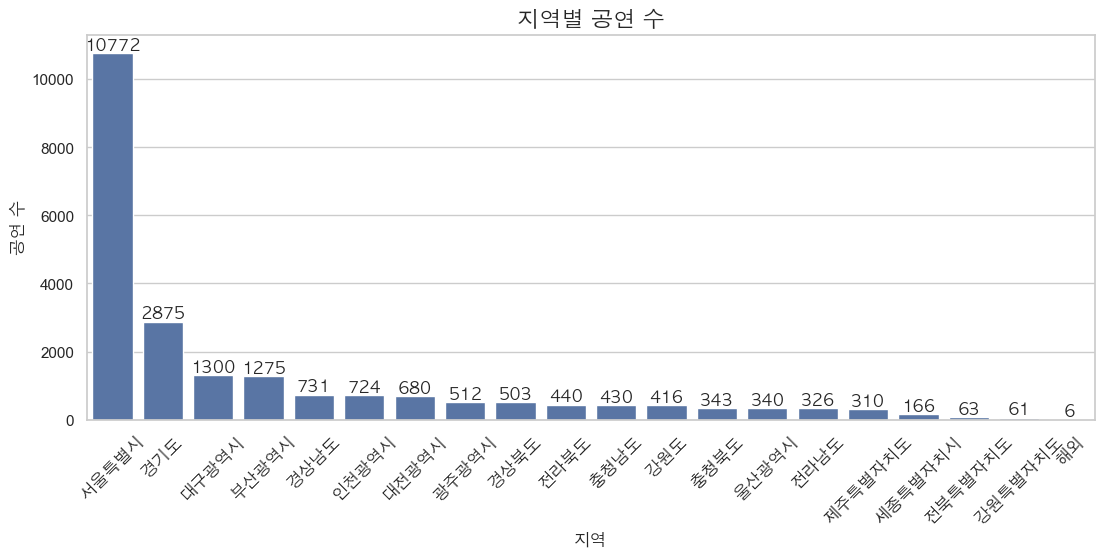

In [73]:
area_counts = df['area'].value_counts().reset_index(name='count')

plt.figure(figsize=(13,5))
ax = sns.barplot(data=area_counts,  x='area', y='count', legend=False)

# Titles and labels
ax.set_title('지역별 공연 수', fontproperties=font_prop, fontsize=16)
ax.set_xlabel('지역', fontproperties=font_prop)
ax.set_ylabel('공연 수', fontproperties=font_prop)

plt.setp(ax.get_xticklabels(), fontproperties=font_prop, rotation=45)

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='bottom',
        fontproperties=font_prop, fontsize=12
    )

plt.show()

# Nb of performances by genre

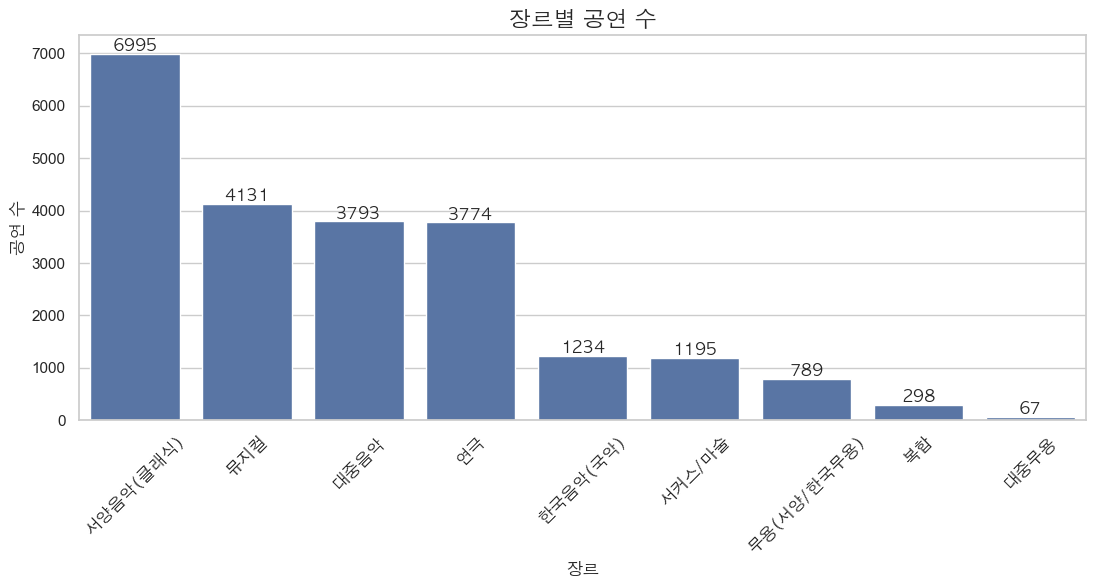

In [76]:
genre_counts = df['genrenm'].value_counts().reset_index(name='count')

plt.figure(figsize=(13,5))
ax = sns.barplot(data=genre_counts,  x='genrenm', y='count', legend=False)

# Titles and labels
ax.set_title('장르별 공연 수', fontproperties=font_prop, fontsize=16)
ax.set_xlabel('장르', fontproperties=font_prop)
ax.set_ylabel('공연 수', fontproperties=font_prop)

plt.setp(ax.get_xticklabels(), fontproperties=font_prop, rotation=45)

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='bottom',
        fontproperties=font_prop, fontsize=12
    )

plt.show()

# Nb of performances by month and genre

In [64]:
month_genre_table = pd.crosstab(df_exploded['months'], df_exploded['genrenm']).sort_index()
month_genre_table

genrenm,대중무용,대중음악,무용(서양/한국무용),뮤지컬,복합,서양음악(클래식),서커스/마술,연극,한국음악(국악)
months,,,,,,,,,
1,2,271,16,758,31,395,400,783,69
2,13,342,32,786,46,572,430,804,128
3,9,480,53,945,51,884,443,915,183
4,9,420,69,926,56,924,442,949,200
5,1,511,87,1058,57,945,473,1036,222
6,4,491,102,1066,51,1048,444,1097,250
7,1,480,97,1027,52,922,448,1080,247
8,10,559,111,1069,75,958,483,1162,270
9,9,576,143,1043,76,1099,455,1082,287


# Nb of performances by area and genre

In [54]:
count_table = pd.crosstab(df['area'], df['genrenm'])
count_table

genrenm,대중무용,대중음악,무용(서양/한국무용),뮤지컬,복합,서양음악(클래식),서커스/마술,연극,한국음악(국악)
area,,,,,,,,,
강원도,0,40,17,81,8,140,21,83,26
강원특별자치도,0,10,2,8,1,28,0,3,9
경기도,16,312,95,753,50,912,320,278,139
경상남도,0,89,19,183,14,213,61,122,30
경상북도,0,65,21,163,8,145,25,49,27
광주광역시,1,81,21,136,25,121,15,74,38
대구광역시,1,131,35,188,24,587,113,186,35
대전광역시,1,83,11,148,6,254,24,108,45
부산광역시,8,194,44,225,15,456,68,215,50


# % Within Each Area (Row-wise)
### Explanation:
- Each row (area) sums to 100%.
- Shows the distribution of genres within a given area.

### Example interpretation:
- 서울: 뮤지컬 13,5%, 연극 20,8%, 클래식 31,4%
- 부산: 뮤지컬 17,6%, 연극 16,9%, 클래식 35,8%

In [55]:
percent_table = count_table.div(count_table.sum(axis=1), axis=0) * 100
percent_table = percent_table.round(2)
percent_table

genrenm,대중무용,대중음악,무용(서양/한국무용),뮤지컬,복합,서양음악(클래식),서커스/마술,연극,한국음악(국악)
area,,,,,,,,,
강원도,0.00,9.62,4.09,19.47,1.92,33.65,5.05,19.95,6.25
강원특별자치도,0.00,16.39,3.28,13.11,1.64,45.90,0.00,4.92,14.75
경기도,0.56,10.85,3.30,26.19,1.74,31.72,11.13,9.67,4.83
경상남도,0.00,12.18,2.60,25.03,1.92,29.14,8.34,16.69,4.10
경상북도,0.00,12.92,4.17,32.41,1.59,28.83,4.97,9.74,5.37
광주광역시,0.20,15.82,4.10,26.56,4.88,23.63,2.93,14.45,7.42
대구광역시,0.08,10.08,2.69,14.46,1.85,45.15,8.69,14.31,2.69
대전광역시,0.15,12.21,1.62,21.76,0.88,37.35,3.53,15.88,6.62
부산광역시,0.63,15.22,3.45,17.65,1.18,35.76,5.33,16.86,3.92


# Crosstab: % of Genre Across All Areas (Column-wise)
### Explanation:
- Each column (genre) sums to 100%.
- Shows how much each area contributes to the total of a genre.
### Example interpretation:
- 뮤지컬: 서울 35,2%, 부산 5,5%, 대구 4,6%
- 클래식: 서울 48,4%, 부산 6,5%, 대구 8,4%

In [56]:
percent_table = count_table.div(count_table.sum(axis=0), axis=1) * 100
percent_table = percent_table.round(2)
percent_table

genrenm,대중무용,대중음악,무용(서양/한국무용),뮤지컬,복합,서양음악(클래식),서커스/마술,연극,한국음악(국악)
area,,,,,,,,,
강원도,0.00,1.06,2.15,1.96,2.68,2.00,1.76,2.20,2.11
강원특별자치도,0.00,0.26,0.25,0.19,0.34,0.40,0.00,0.08,0.73
경기도,23.88,8.23,12.04,18.23,16.78,13.04,26.78,7.37,11.26
경상남도,0.00,2.35,2.41,4.43,4.70,3.05,5.10,3.23,2.43
경상북도,0.00,1.72,2.66,3.95,2.68,2.07,2.09,1.30,2.19
광주광역시,1.49,2.14,2.66,3.29,8.39,1.73,1.26,1.96,3.08
대구광역시,1.49,3.46,4.44,4.55,8.05,8.39,9.46,4.93,2.84
대전광역시,1.49,2.19,1.39,3.58,2.01,3.63,2.01,2.86,3.65
부산광역시,11.94,5.12,5.58,5.45,5.03,6.52,5.69,5.70,4.05
